In [1]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import tensorflowjs as tfjs
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pipeline.prepare import prepare_data_tfds, prepare_data_kaggle
from pipeline.model import create_model
from pipeline.evaluate import plot_learning_curves

,color_params,exp_params,illum_params,image,landmarks_2d,landmarks_3d,landmarks_origin,pose_params,roi,shape_params,tex_params
0,"ndarray(shape=(7,), dtype=float32)","ndarray(shape=(29,), dtype=float32)","ndarray(shape=(10,), dtype=float32)",,"ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(7,), dtype=float32)","ndarray(shape=(4,), dtype=float32)","ndarray(shape=(199,), dtype=float32)","ndarray(shape=(199,), dtype=float32)"
1,"ndarray(shape=(7,), dtype=float32)","ndarray(shape=(29,), dtype=float32)","ndarray(shape=(10,), dtype=float32)",,"ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(7,), dtype=float32)","ndarray(shape=(4,), dtype=float32)","ndarray(shape=(199,), dtype=float32)","ndarray(shape=(199,), dtype=float32)"
2,"ndarray(shape=(7,), dtype=float32)","ndarray(shape=(29,), dtype=float32)","ndarray(shape=(10,), dtype=float32)",,"ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(7,), dtype=float32)","ndarray(shape=(4,), dtype=float32)","ndarray(shape=(199,), dtype=float32)","ndarray(shape=(199,), dtype=float32)"
3,"ndarray(shape=(7,), dtype=float32)","ndarray(shape=(29,), dtype=float32)","ndarray(shape=(10,), dtype=float32)",,"ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(7,), dtype=float32)","ndarray(shape=(4,), dtype=float32)","ndarray(shape=(199,), dtype=float32)","ndarray(shape=(199,), dtype=float32)"

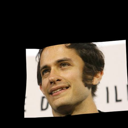
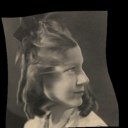
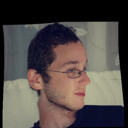
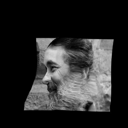

In [2]:
ds, info = tfds.load('the300w_lp', split='train', with_info=True)
tfds.as_dataframe(ds.take(4), info)

In [33]:
x_train, x_test, y_train, y_test = prepare_data_tfds('the300w_lp', 'landmarks_3d', 2000)

In [20]:
model = create_model((450,450,3), 136)

In [21]:
model.summary()

Model: "deepmoji"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 450, 450, 3)]     0         
_________________________________________________________________
normalization_1 (Normalizati (None, 450, 450, 3)       7         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 450, 450, 32)      864       
_________________________________________________________________
batch_normalization_5 (Batch (None, 450, 450, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 225, 225, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 225, 225, 32)      9216      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 32)      0  

In [22]:
history = model.fit(x_train, y_train, batch_size=50, epochs=20, validation_data =(x_test, y_test))

Epoch 1/20
30/30 [==============================] - 179s 6s/step - loss: 35443.4623 - val_loss: 43160.1016
Epoch 2/20
30/30 [==============================] - 183s 6s/step - loss: 2168.1007 - val_loss: 26553.9551
Epoch 3/20
30/30 [==============================] - 182s 6s/step - loss: 1215.2750 - val_loss: 11464.8164
Epoch 4/20
30/30 [==============================] - 178s 6s/step - loss: 1017.4778 - val_loss: 5331.1494
Epoch 5/20
30/30 [==============================] - 177s 6s/step - loss: 828.4014 - val_loss: 3702.3972
Epoch 6/20
30/30 [==============================] - 179s 6s/step - loss: 788.4974 - val_loss: 2089.5828
Epoch 7/20
30/30 [==============================] - 177s 6s/step - loss: 704.2812 - val_loss: 1140.8164
Epoch 8/20
30/30 [==============================] - 177s 6s/step - loss: 722.7198 - val_loss: 767.8121
Epoch 9/20
30/30 [==============================] - 178s 6s/step - loss: 665.2759 - val_loss: 684.7985
Epoch 10/20
30/30 [==============================] - 177s 

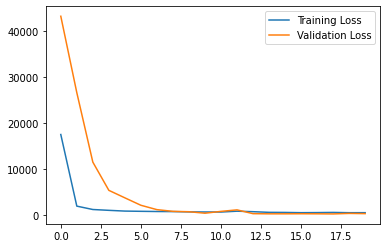

In [23]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [24]:
predicts = model.predict(x[:10])

In [27]:
p = list(map(lambda x: x, predicts))

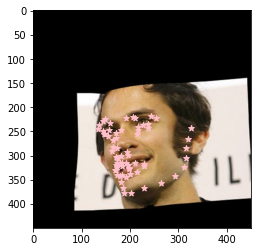

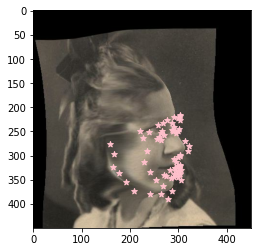

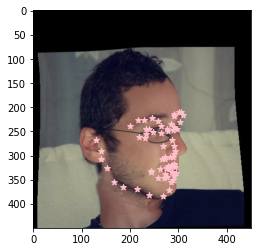

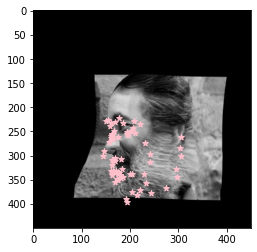

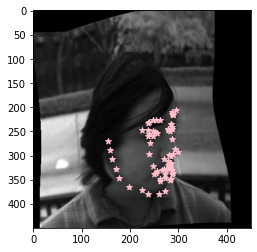

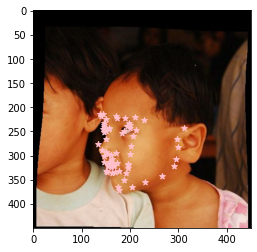

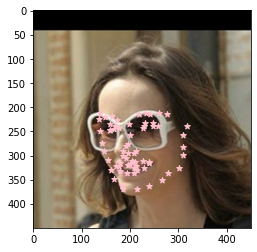

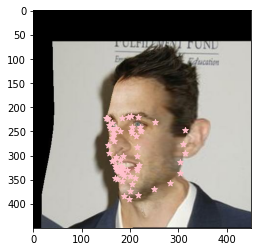

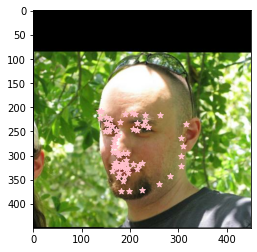

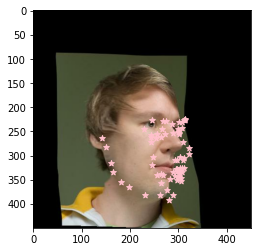

In [28]:
for i in range(len(p)):
    plt.imshow(np.uint8(x[i]))
    plt.scatter(p[i][0::2], p[i][1::2], c='Pink', marker='*')
    plt.show()

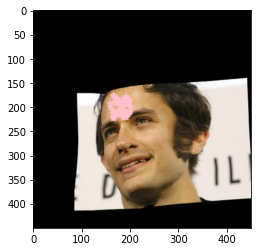

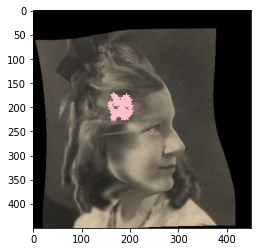

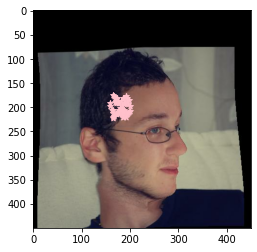

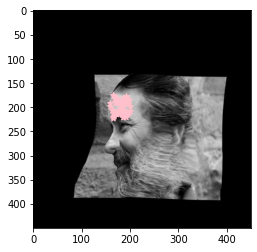

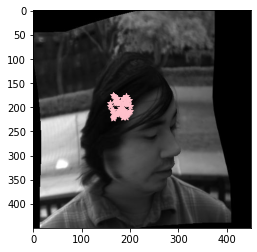

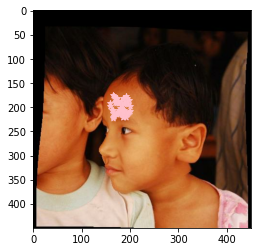

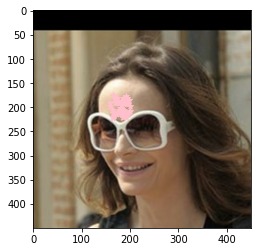

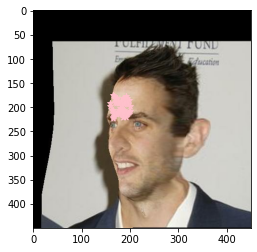

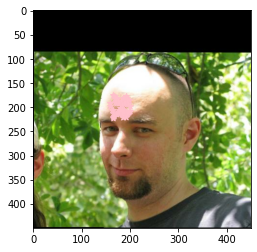

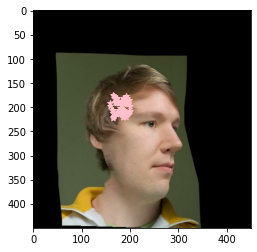

In [17]:
for i in range(len(p)):
    plt.imshow(np.uint8(x[i]))
    plt.scatter(p[i][0::2], p[i][1::2], c='Pink', marker='*')
    plt.show()

In [54]:
tfjs.converters.save_keras_model(model, 'deepmoji_tfjs_300w_lp')